In [1]:
# Paqueterias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import trapz

In [2]:
# Constantes
h = 0.7 # H0/(100 km/s/Mpc)
Neff = 3.045
# Kelvin to eV
Kev = 1/(11604.5) # eV
# Temperatures today
# CMB photons
Tg0 = 2.726*Kev
# Neutrinos
Tnu0 = (4/11)**(1/3)*Tg0
# Variables
# Scale factor a
a_min = 1e-5
a_max = 1
a_arr = np.linspace(a_min,a_max,10000)
# a_arr = np.linspace(a_min,a_max,200000)
# Redshift
z_arr = 1/a_arr - 1

In [3]:
def Tnu(a):
    return Tnu0/a
def fermi_dirac(p,a, Mnu):
    return np.sqrt(p**2 + Mnu**2)*p**2/(1 + np.exp(p/Tnu(a)))

In [4]:
def rhonu_m(Mnu):
    p_lower1 = 1e-16
    p_upper1 = 1000
    integral_values1 = np.empty_like(a_arr)
# Perform numerical integration for each y value
    for i, y in enumerate(a_arr):
        integral_values1[i] = np.trapz(fermi_dirac(np.linspace(p_lower1, p_upper1, 60000), y, Mnu), np.linspace(p_lower1, p_upper1, 60000))
# Second integral
    p_lower2 = 1e-16
    p_upper2 = 10
    integral_values2 = np.empty_like(a_arr)
    # Perform numerical integration for each y value
    for i, y in enumerate(a_arr):
        integral_values2[i] = np.trapz(fermi_dirac(np.linspace(p_lower2, p_upper2, 60000), y, Mnu), np.linspace(p_lower2, p_upper2, 60000))
# densities
    rhonu1 = (1/np.pi**2)*integral_values1
    rhonu2 = (1/np.pi**2)*integral_values2
# Find index chnage
    differences = np.abs(a_arr - 1e-3)
# Find the index where the difference is minimum
    index = np.argmin(differences)
    rhonu = np.concatenate((rhonu1[:index], rhonu2[index:]))

    if Mnu == 0:
        return rhonu, 0
    elif Mnu != 0:
        return rhonu, 3.15*Tnu0/Mnu
    # return rhonu

In [5]:
rhonu_0 = rhonu_m(0)[0]
rhonu_1, a_tr_1 = rhonu_m(1)
rhonu_01, a_tr_01 = rhonu_m(0.1)
rhonu_001, a_tr_001 = rhonu_m(0.01)

C:\Users\hugor\AppData\Local\Temp\ipykernel_26192\3101367592.py:4: RuntimeWarning: overflow encountered in exp
  return np.sqrt(p**2 + Mnu**2)*p**2/(1 + np.exp(p/Tnu(a)))


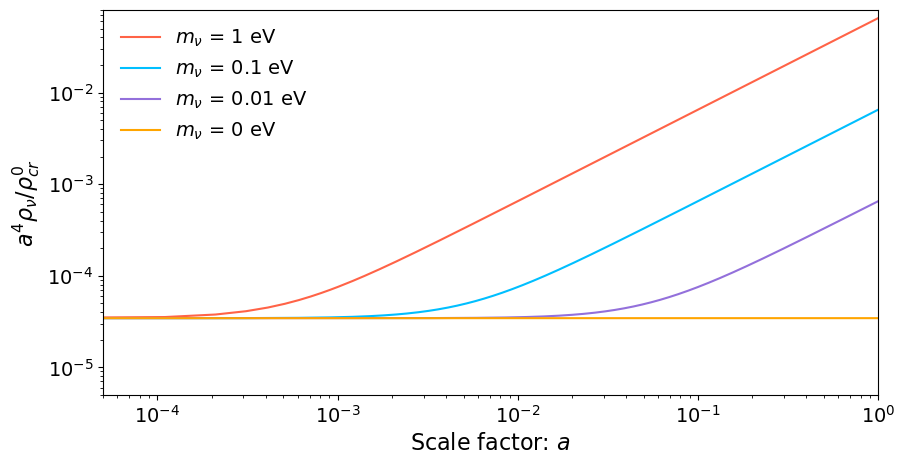

In [33]:
plt.figure(figsize=(10, 5))
color_vector = ['tomato', 'deepskyblue', 'mediumpurple', 'orange']
plt.plot(a_arr, a_arr**4 * rhonu_1 / (1.325e-11), label='$m_\\nu$ = 1 eV', color=color_vector[0])
plt.plot(a_arr, a_arr**4 * rhonu_01 / (1.325e-11), label=f'$m_\\nu$ = 0.1 eV', color=color_vector[1])
plt.plot(a_arr, a_arr**4 * rhonu_001 / (1.325e-11), label=f'$m_\\nu$ = 0.01 eV', color=color_vector[2])
plt.plot(a_arr, a_arr**4 * rhonu_0 / (1.325e-11), label=f'$m_\\nu$ = 0 eV', color=color_vector[3])
plt.ylabel('$a^4\\rho_\\nu/\\rho^0_{cr}$', fontsize=16)
plt.xlabel('Scale factor: $a$', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc='best', fontsize=14, frameon=False)
plt.xlim([0.5e-4, 1])
plt.ylim([0.5e-5, 0.8e-1])
plt.xscale('log')
plt.yscale('log')
plt.savefig('Fig2.2.pdf', format='pdf', bbox_inches='tight')
plt.show()